# **Data Science Mini Project**
## **Topic: Email Spam Classifier**
---



## Group Members:
###**1. Pranav Wagh ------- 21810340 --- 322061**
###**2. Samruddhi Desai --- 21920035 --- 322063**
###**3. Vedant Bajaj -------- 21810038 --- 322060**

---






# Email Spam Classifier using NLP

#### Dataset Link: https://www.kaggle.com/bagavathypriya/email-spam-dataset

---



## 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Importing the Dataset

In [2]:
dataset = pd.read_csv('EmailSpam.csv')

## 3. Visualizing Dataset before Processing

### 3.1 View of Dataset

In [3]:
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


### 3.2 Generating a Word Cloud for all emails

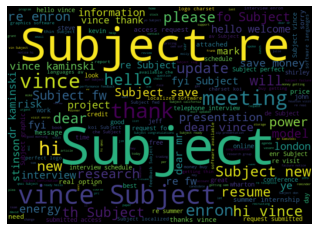

In [4]:
allEmails = dataset['text'].to_string()
from wordcloud import WordCloud
wordCloud = WordCloud(width=700,height=500,random_state=21,max_font_size=119).generate(allEmails)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## 4. Cleaning the Text - Data Preprocessing

### 4.1 Checking for Null values

In [5]:
dataset.isnull().sum()

text    0
spam    0
dtype: int64

### 4.2 Importing Libraries and downloading Stopwords

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4.3 Removing Stepwords and other Text Preprocessing

In [7]:
all_emails = []
for i in range(0, 5728):
  email = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
  email = email.lower()
  email = email.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  #all_stopwords.remove('not')
  email = [ps.stem(word) for word in email if not word in set(all_stopwords)]
  email = ' '.join(email)
  all_emails.append(email)

### 4.4 Printing first email after Data Preprocessing

In [8]:
print(all_emails[0])

subject natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest


## 5. Creating the Bag of Words Model

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(all_emails).toarray()
y = dataset.iloc[:, -1].values

## 6. Visualizing Dataset after Processing

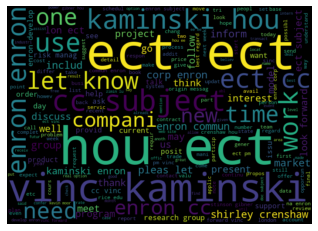

In [10]:
all_emails = ' '.join(all_emails)
from wordcloud import WordCloud
wordCloud = WordCloud(width=700,height=500,random_state=21,max_font_size=119).generate(all_emails)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## 7. Splitting the dataset into the Training set and Test set (80%-20%)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## 8. Training the Naive Bayes model on the Training set

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## 9. Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [1 1]]


## 10. Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[875  10]
 [ 35 226]]


0.9607329842931938

## 11. Visualizing Confusion Matrix

Text(0.5, 15.0, 'Predicted Result')

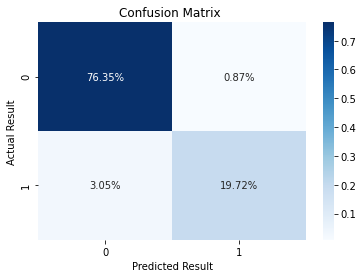

In [15]:
import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix ')
plt.ylabel('Actual Result')
plt.xlabel('Predicted Result')

## 12. Printing classification report

In [18]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       885
           1       0.96      0.87      0.91       261

    accuracy                           0.96      1146
   macro avg       0.96      0.93      0.94      1146
weighted avg       0.96      0.96      0.96      1146

